<a href="https://colab.research.google.com/github/YuvrajKhade/CodeAI-x-Microsoft-ReSkill-Internship/blob/main/Project%203%3A%20Diabetes%20analysis%20and%20prediction/Diabetes_prediction_and_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diabetes Data Visualization and Analysis**

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.compose import make_column_selector
import warnings

import plotly.express as px
px_template = "simple_white"


%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

In [ ]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


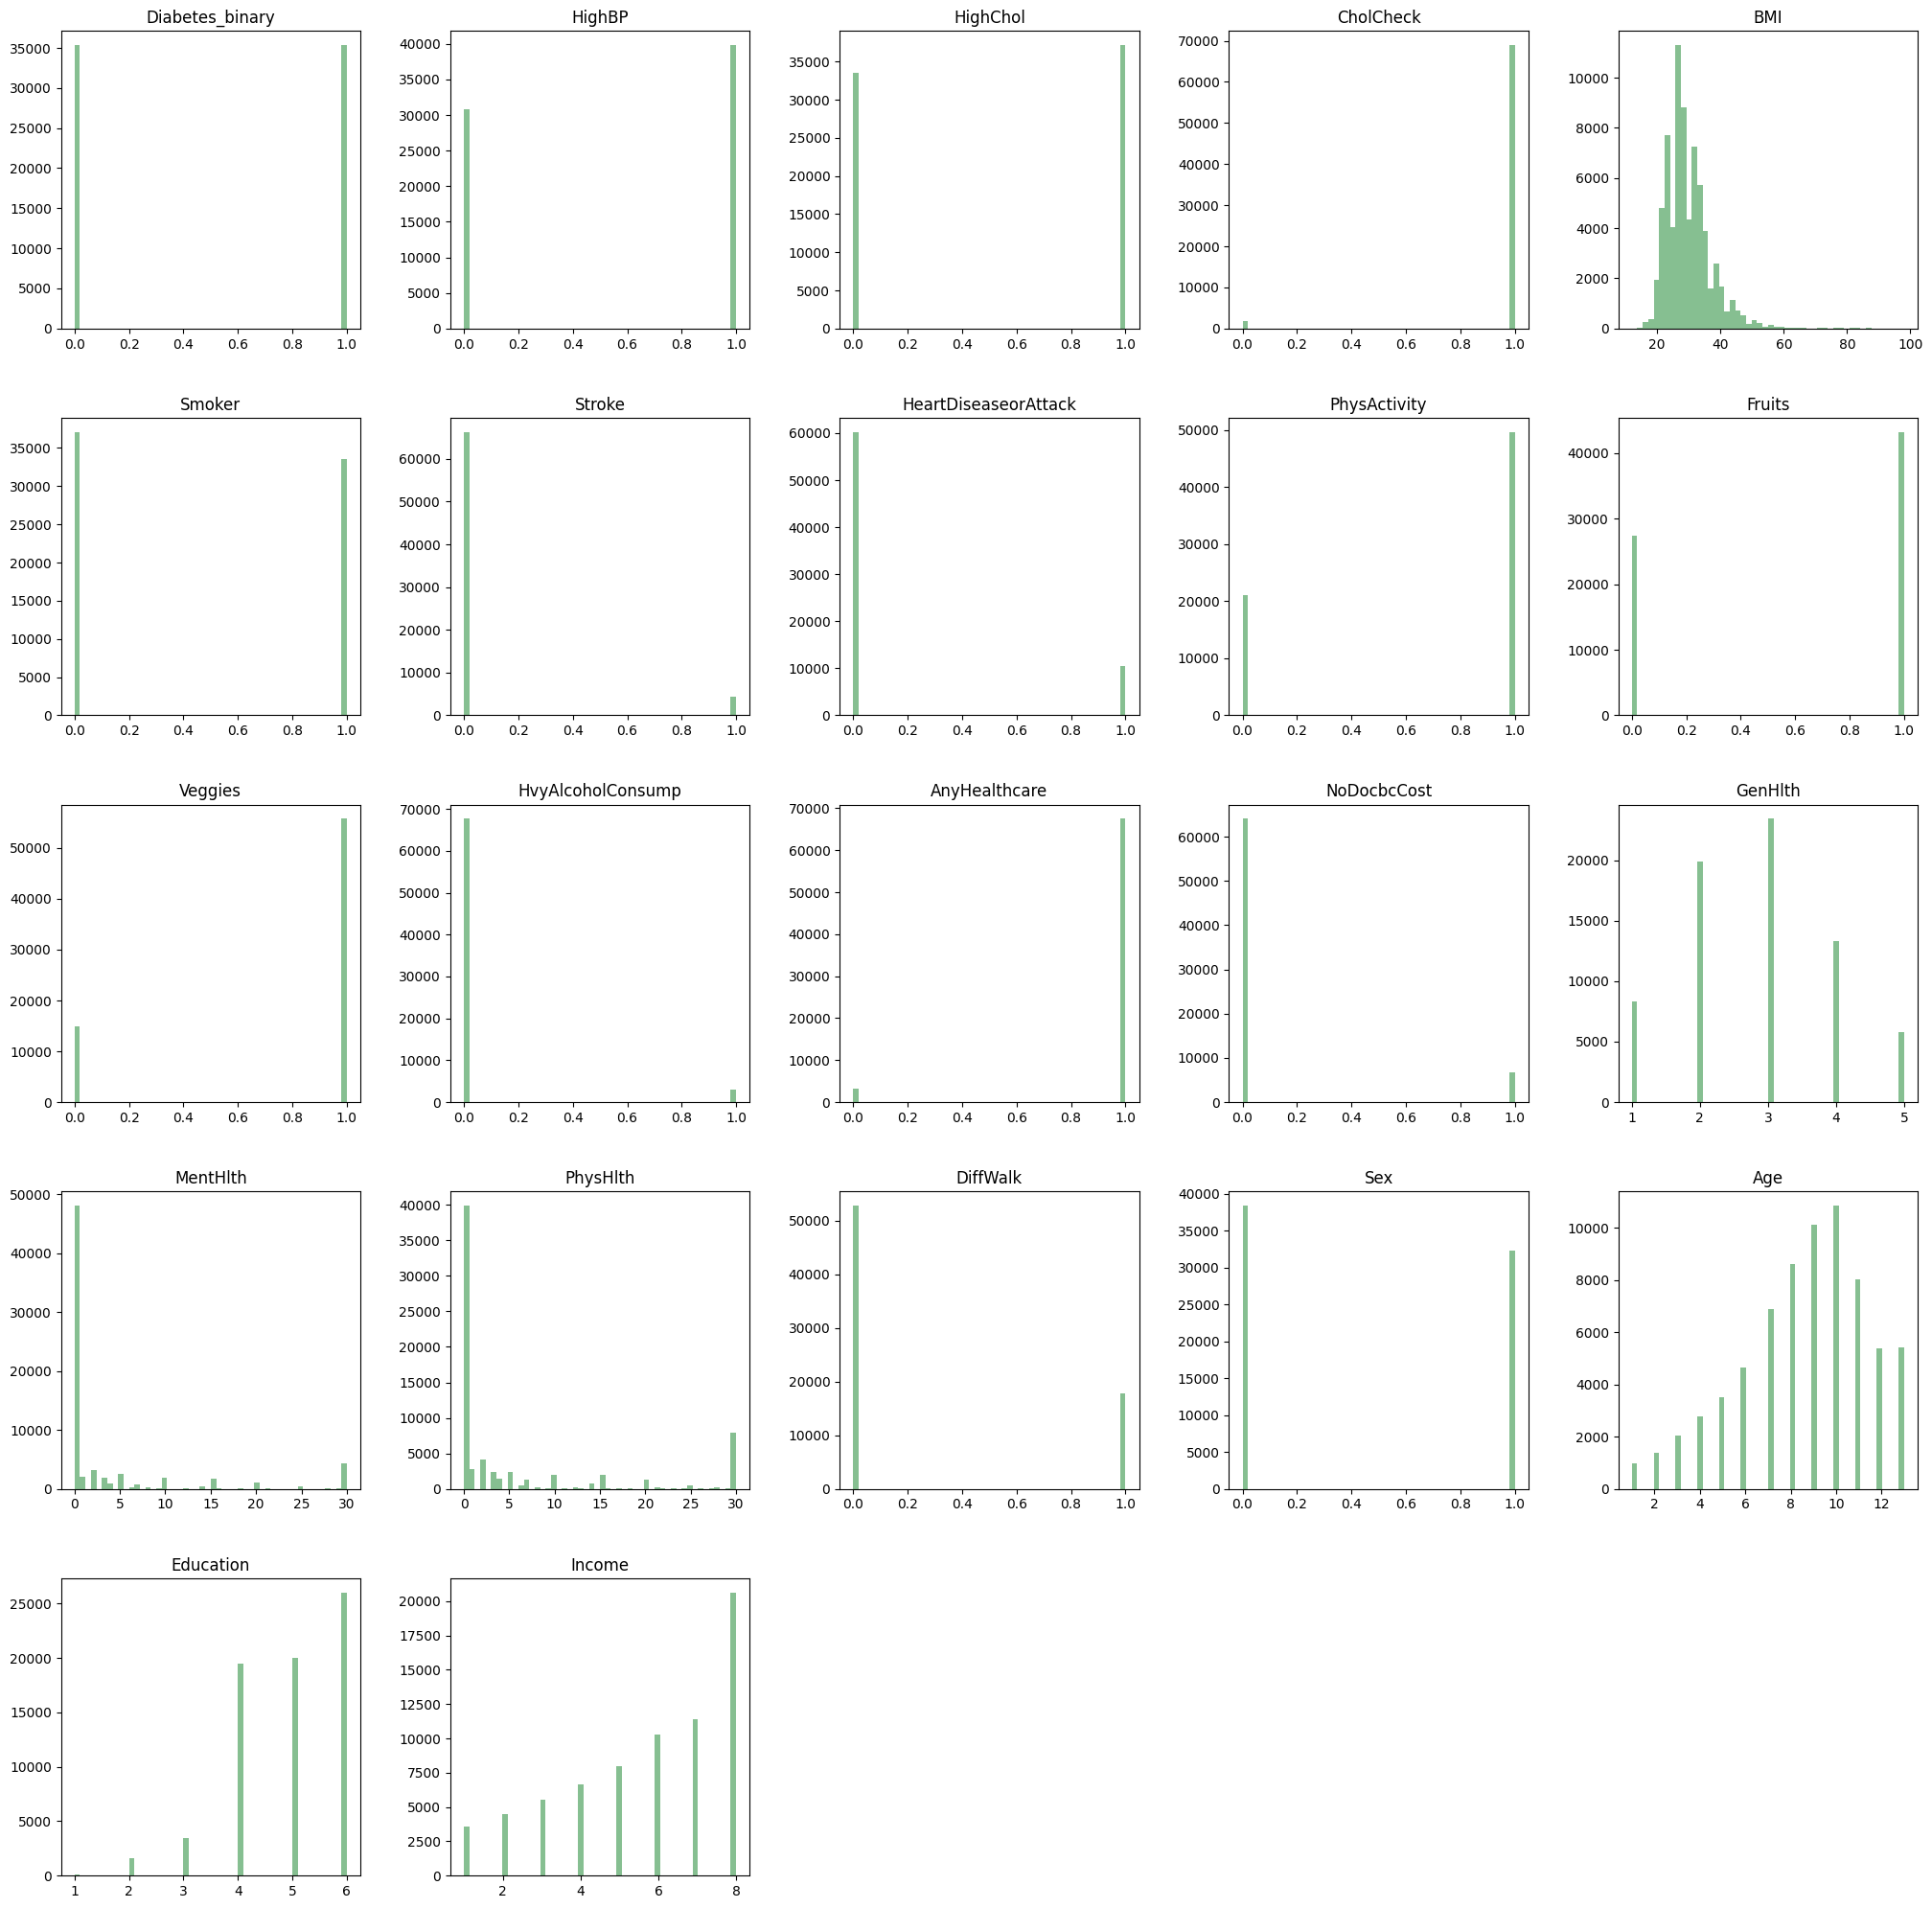

In [ ]:
ax = data.hist(bins=50, grid=False, figsize=(25,25), color='#86bf91')


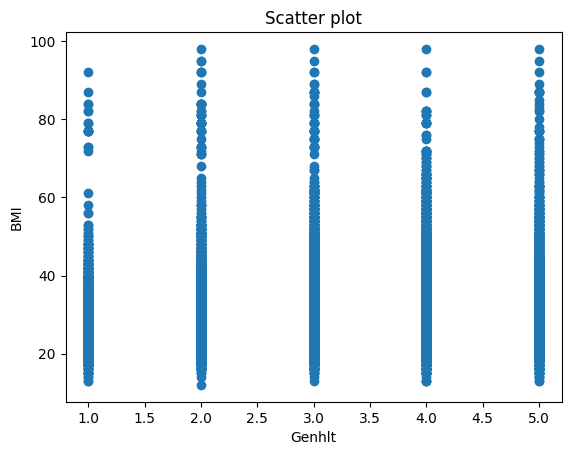

In [ ]:
plt.scatter(data['GenHlth'],data['BMI'])
plt.title('Scatter plot')

plt.xlabel('Genhlt')
plt.ylabel('BMI')
plt.show()

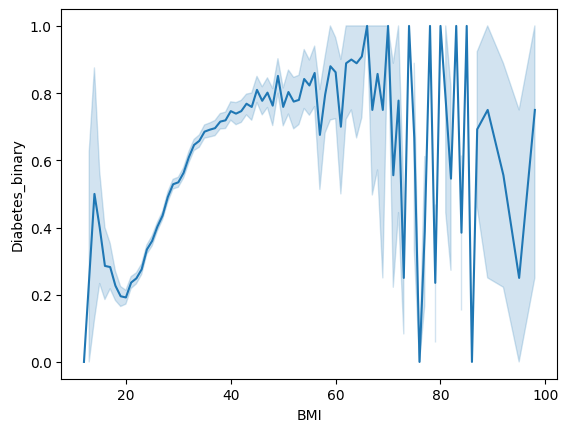

In [ ]:
#line plot
sns.lineplot(x='BMI',y='Diabetes_binary',data=data)
plt.show()

<Axes: title={'center': 'Correlation of diabetes  patient'}>

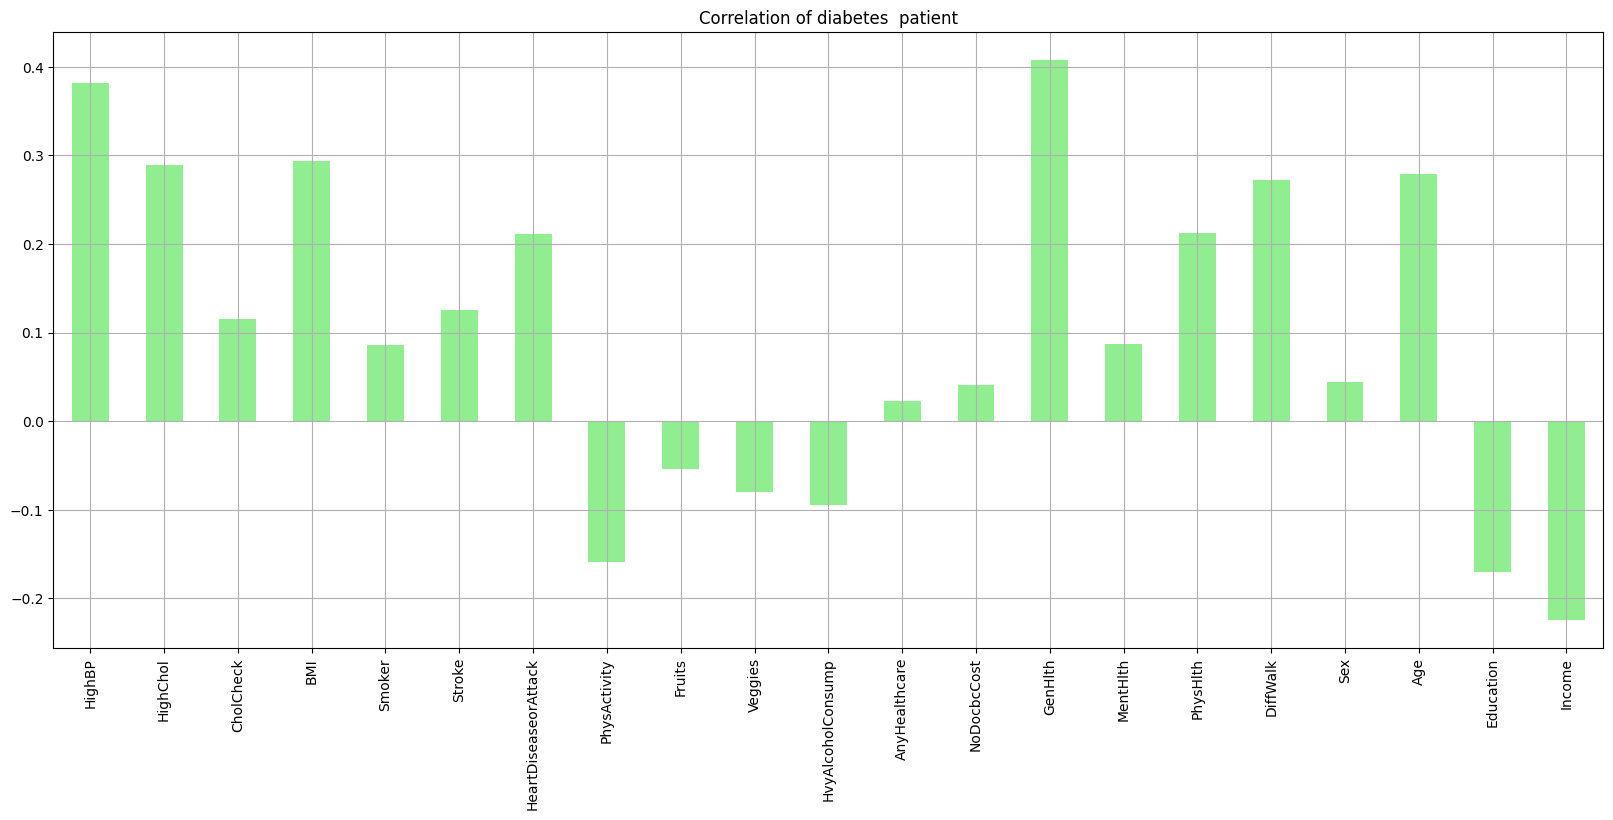

In [ ]:
#Correlation plot
data.drop('Diabetes_binary',axis=1).corrwith(data.Diabetes_binary).plot(kind='bar',grid=True,figsize=(20,8),title='Correlation of diabetes  patient', color='lightgreen')

In [ ]:
# fig1,plot1=plt.subplots(1,2,figsize=(8,8))
# sns.countplot(data['Diabetes_binary'],ax=plot1[0])
# labels=['non-dibeteic','dibeteic']
# plt.pie(data['Diabetes_binary'].value_counts(),labels=labels,autopct='%1.1f')

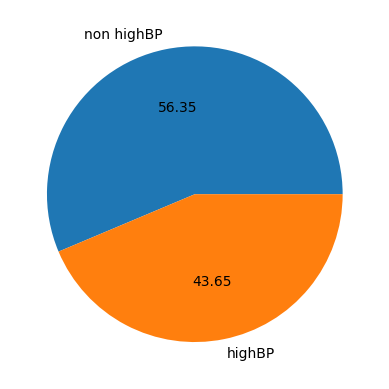

In [ ]:
plt.pie(data['HighBP'].value_counts(),autopct='%.2f',labels=['non highBP','highBP'])
plt.show()

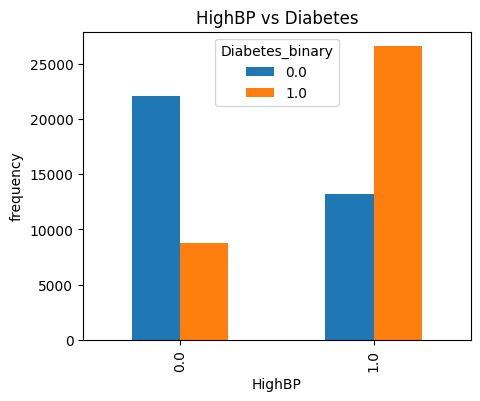

In [ ]:
pd.crosstab(data['HighBP'],data['Diabetes_binary']).plot(kind='bar', figsize=(5,4))
plt.title('HighBP vs Diabetes')
plt.xlabel('HighBP')
plt.ylabel('frequency')
plt.show()

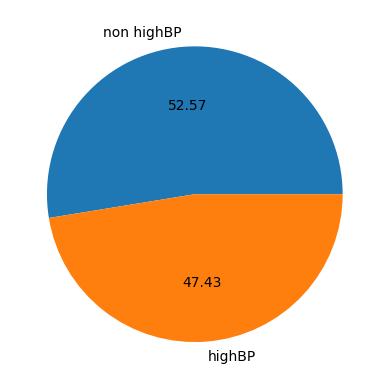

In [ ]:
plt.pie(data['HighChol'].value_counts(),autopct='%.2f',labels=['non highBP','highBP'])
plt.show()

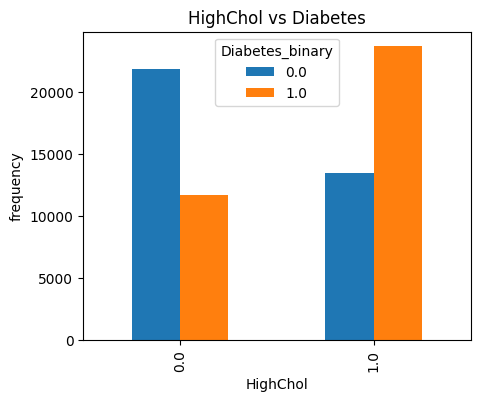

In [ ]:
pd.crosstab(data['HighChol'],data['Diabetes_binary']).plot(kind='bar', figsize=(5,4))
plt.title('HighChol vs Diabetes')
plt.xlabel('HighChol')
plt.ylabel('frequency')
plt.show()

In [ ]:
(data.groupby(['HighBP','HighChol'])['Diabetes_binary'].value_counts()/data.groupby(['HighBP','HighChol'])['Diabetes_binary'].count())*100

HighBP  HighChol  Diabetes_binary
0.0     0.0       0.0                78.843295
                  1.0                21.156705
        1.0       0.0                58.125819
                  1.0                41.874181
1.0     0.0       1.0                55.359149
                  0.0                44.640851
        1.0       1.0                72.553907
                  0.0                27.446093
dtype: float64

visualizing above data

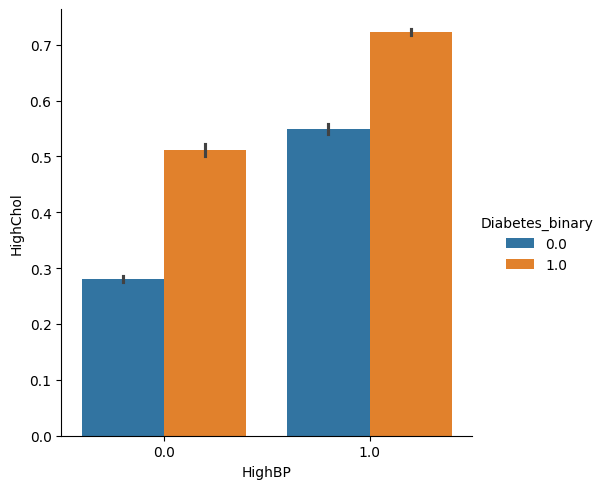

In [ ]:
sns.catplot(x='HighBP',y='HighChol',hue='Diabetes_binary',data=data,kind='bar')
plt.show()

In [ ]:
# plt.figure(figsize=(10,10))
# sns.countplot(data.BMI[data.Diabetes_binary==1],color='green',label='Diabetes')
# sns.countplot(data.BMI[data.Diabetes_binary==0],color='red',label='No Diabetes')
# plt.title('Realtion b/w BMI and Diabetes')
# plt.legend()



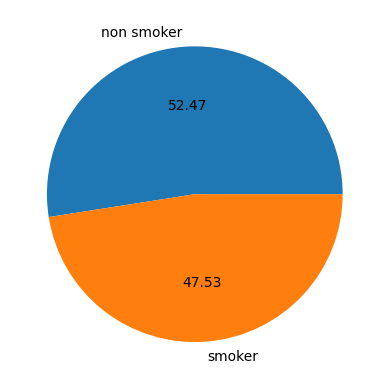

In [ ]:
label=["non smoker","smoker"]
plt.pie(data['Smoker'].value_counts(),labels=label, autopct='%.2f')
plt.show()

In [ ]:
pd.crosstab(data.Smoker,data.Diabetes_binary)


Diabetes_binary,0.0,1.0
Smoker,,
0.0,20065,17029
1.0,15281,18317


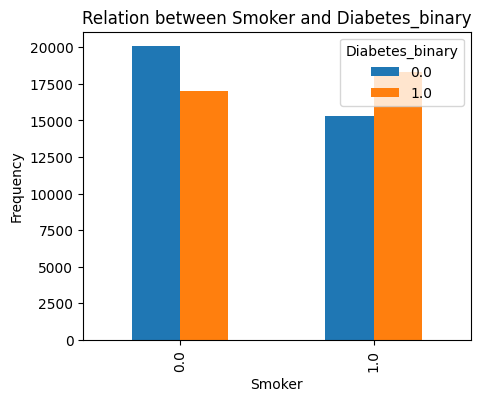

In [ ]:
pd.crosstab(data.Smoker, data.Diabetes_binary).plot(kind="bar",figsize=(5,4))

plt.title('Relation between Smoker and Diabetes_binary')
plt.xlabel("Smoker")
plt.ylabel('Frequency')
plt.show()

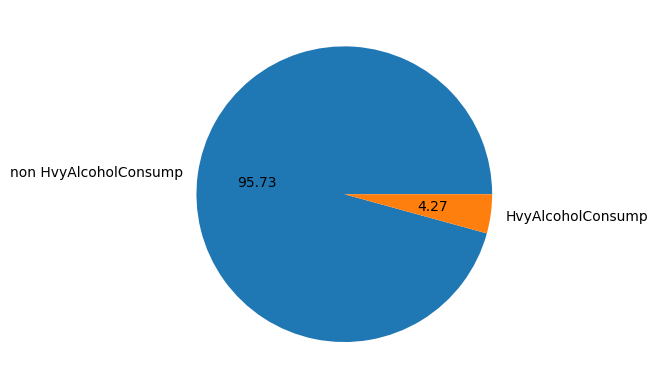

In [ ]:
labels=["non HvyAlcoholConsump","HvyAlcoholConsump"]

plt.pie(data["HvyAlcoholConsump"].value_counts() , labels =labels ,autopct='%.02f' );

In [ ]:
pd.crosstab(data.HvyAlcoholConsump, data.Diabetes_binary)


Diabetes_binary,0.0,1.0
HvyAlcoholConsump,,
0.0,33158,34514
1.0,2188,832


**checking the relation between HvyAlcoholConsump and Diabetes_binary**

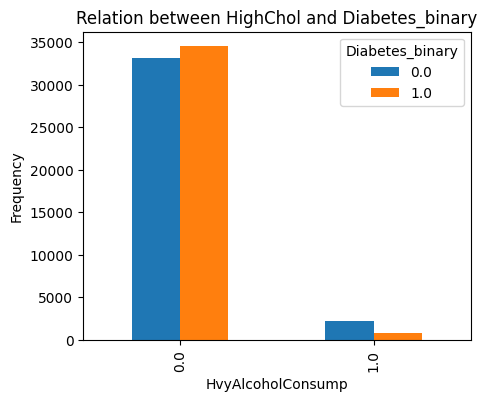

In [ ]:
pd.crosstab(data.HvyAlcoholConsump, data.Diabetes_binary).plot(kind="bar",figsize=(5,4))

plt.title('Relation between HighChol and Diabetes_binary')
plt.xlabel("HvyAlcoholConsump")
plt.ylabel('Frequency')
plt.show()

**Conclusion**
The data doesn't have unequal proportions of diabetic patients and non-diabetic patients who consume and do not consume HvyAlcohol. Therefore, we cannot really predict the effect of HvyAlcoholConsump on Diabetic_binary





**checking Smoker and HvyAlcoholConsump's combined effect on Diabetes_binary**

In [ ]:
(data.groupby(["Smoker" , "HvyAlcoholConsump"])["Diabetes_binary"].value_counts()/data.groupby(["Smoker" , "HvyAlcoholConsump"])["Diabetes_binary"].count())*100


Smoker  HvyAlcoholConsump  Diabetes_binary
0.0     0.0                0.0                53.373076
                           1.0                46.626924
        1.0                0.0                79.300292
                           1.0                20.699708
1.0     0.0                1.0                55.993925
                           0.0                44.006075
        1.0                0.0                68.910095
                           1.0                31.089905
dtype: float64

Text(0.5, 1.0, 'Relation b/w Smoker ,HvyAlcoholConsump and Diabetes')

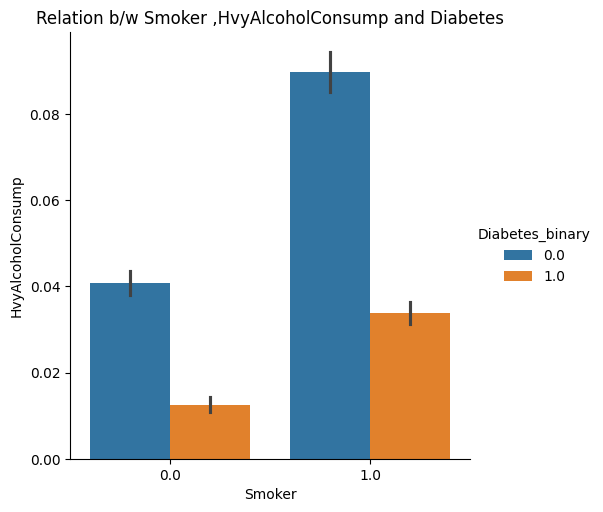

In [ ]:
sns.catplot(x="Smoker" , y ="HvyAlcoholConsump" , data = data , hue="Diabetes_binary"  , kind="bar"  );
plt.title("Relation b/w Smoker ,HvyAlcoholConsump and Diabetes")

In [ ]:
(data.groupby(["Stroke" , "HeartDiseaseorAttack"])["Diabetes_binary"].value_counts()/data.groupby(["Stroke" , "HeartDiseaseorAttack"])["Diabetes_binary"].count())*100


Stroke  HeartDiseaseorAttack  Diabetes_binary
0.0     0.0                   0.0                55.340444
                              1.0                44.659556
        1.0                   1.0                73.904807
                              0.0                26.095193
1.0     0.0                   1.0                68.227425
                              0.0                31.772575
        1.0                   1.0                81.677484
                              0.0                18.322516
dtype: float64

Text(0.5, 1.0, 'Relation b/w Stroke ,HeartDiseaseorAttack and Diabetes')

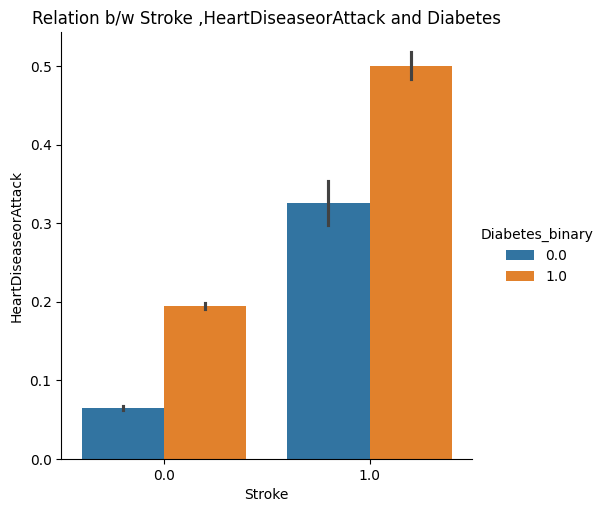

In [ ]:
sns.catplot(x="Stroke" , y ="HeartDiseaseorAttack" , data = data , hue="Diabetes_binary"  , kind="bar"  );
plt.title("Relation b/w Stroke ,HeartDiseaseorAttack and Diabetes")

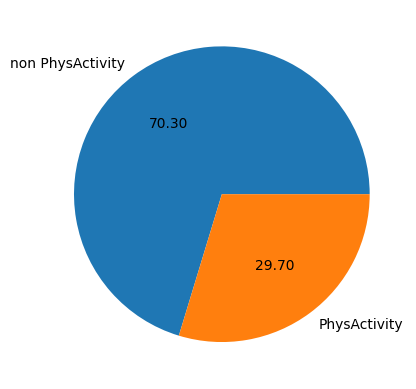

In [ ]:
labels=["non PhysActivity","PhysActivity"]

plt.pie(data["PhysActivity"].value_counts() , labels =labels ,autopct='%.02f' );


In [ ]:
pd.crosstab(data.PhysActivity, data.Diabetes_binary)


Diabetes_binary,0.0,1.0
PhysActivity,,
0.0,7934,13059
1.0,27412,22287


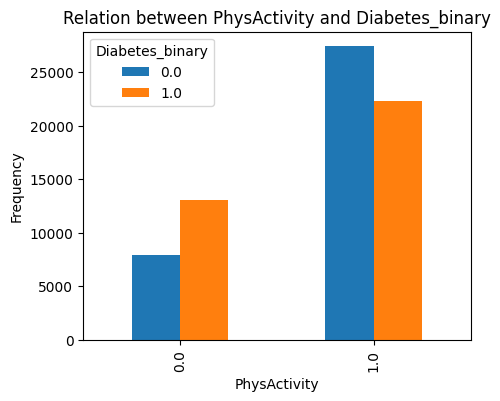

In [ ]:
pd.crosstab(data.PhysActivity, data.Diabetes_binary).plot(kind="bar",figsize=(5,4))

plt.title('Relation between PhysActivity and Diabetes_binary')
plt.xlabel("PhysActivity")
plt.ylabel('Frequency')
plt.show()

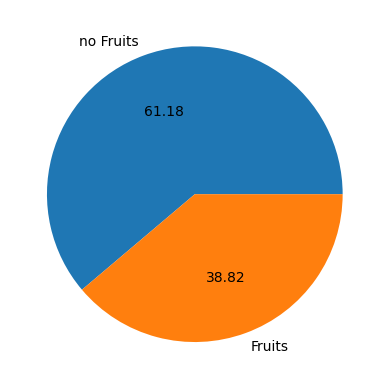

In [ ]:
labels=["no Fruits","Fruits"]

plt.pie(data["Fruits"].value_counts() , labels =labels ,autopct='%.02f' );

In [ ]:
pd.crosstab(data.Fruits, data.Diabetes_binary)


Diabetes_binary,0.0,1.0
Fruits,,
0.0,12790,14653
1.0,22556,20693


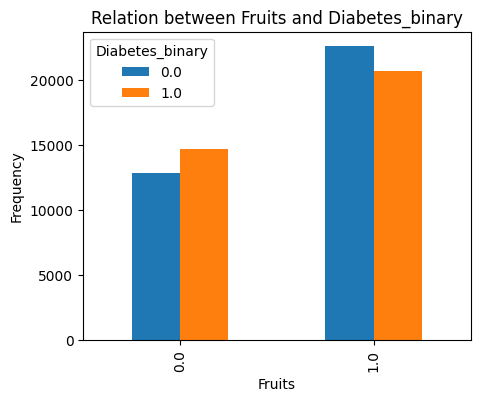

In [ ]:
pd.crosstab(data.Fruits, data.Diabetes_binary).plot(kind="bar",figsize=(5,4))

plt.title('Relation between Fruits and Diabetes_binary')
plt.xlabel("Fruits")
plt.ylabel('Frequency')
plt.show()

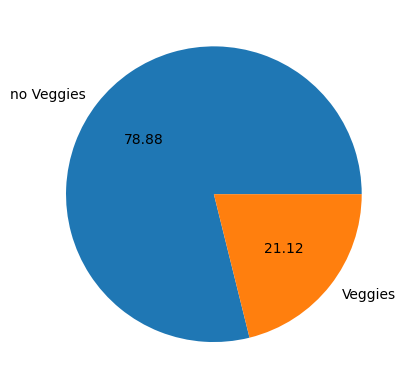

In [ ]:
labels=["no Veggies","Veggies"]

plt.pie(data["Veggies"].value_counts() , labels =labels ,autopct='%.02f' );

In [ ]:
pd.crosstab(data.Veggies, data.Diabetes_binary)


Diabetes_binary,0.0,1.0
Veggies,,
0.0,6322,8610
1.0,29024,26736


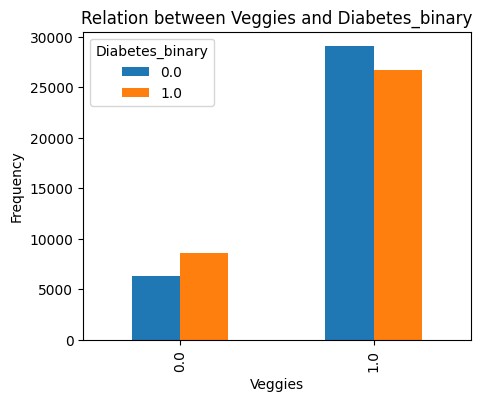

In [ ]:
pd.crosstab(data.Veggies, data.Diabetes_binary).plot(kind="bar",figsize=(5,4))

plt.title('Relation between Veggies and Diabetes_binary')
plt.xlabel("Veggies")
plt.ylabel('Frequency')
plt.show()

In [ ]:
pd.crosstab(data.GenHlth, data.Diabetes_binary)


Diabetes_binary,0.0,1.0
GenHlth,,
1.0,7142,1140
2.0,13491,6381
3.0,9970,13457
4.0,3513,9790
5.0,1230,4578


In [ ]:
plt.figure(figsize=(45, 17))
warnings.filterwarnings('ignore')

sns.countplot(data.BMI[data.Diabetes_binary == 0], color="green", label="No Diabetes")
sns.countplot(data.BMI[data.Diabetes_binary == 1], color="purple", label="Diabetes" )
plt.title("Relation b/w BMI and Diabetes")

plt.legend()


NameError: name 'plt' is not defined

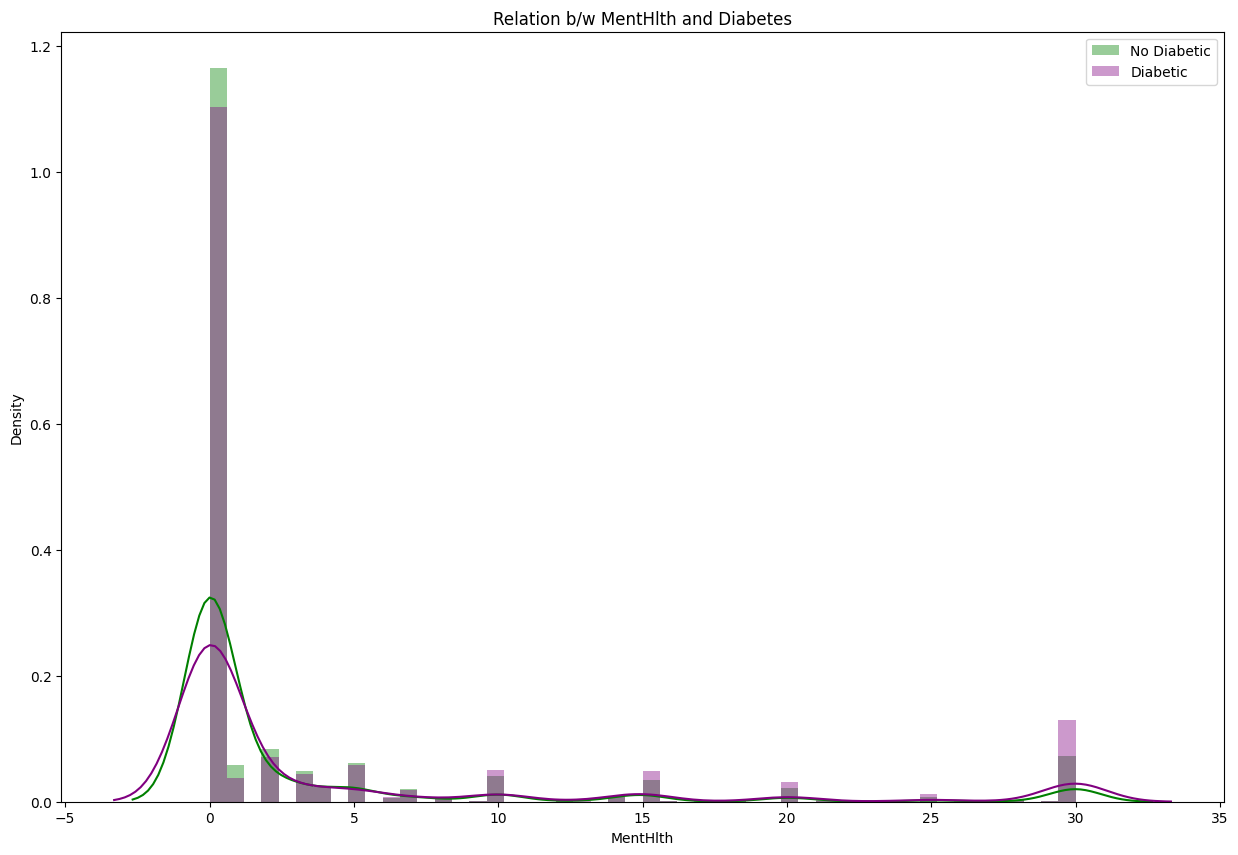

In [ ]:
plt.figure(figsize=(15, 10))
warnings.filterwarnings('ignore')

sns.distplot(data.MentHlth[data.Diabetes_binary == 0], color="green", label="No Diabetic" )
sns.distplot(data.MentHlth[data.Diabetes_binary == 1], color="purple", label="Diabetic" )
plt.title("Relation b/w MentHlth and Diabetes")

plt.legend()

In [ ]:
pd.crosstab(data.PhysHlth, data.Diabetes_binary).T


PhysHlth,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0
Diabetes_binary,,,,,,,,,,,,,,,,,,,,,
0.0,23175,1665,2074,1149,613,1018,165,583,117,19,...,90,8,11,9,163,4,13,68,21,2227
1.0,16740,1188,2028,1289,763,1314,282,743,159,36,...,139,23,16,15,394,22,21,143,74,5726


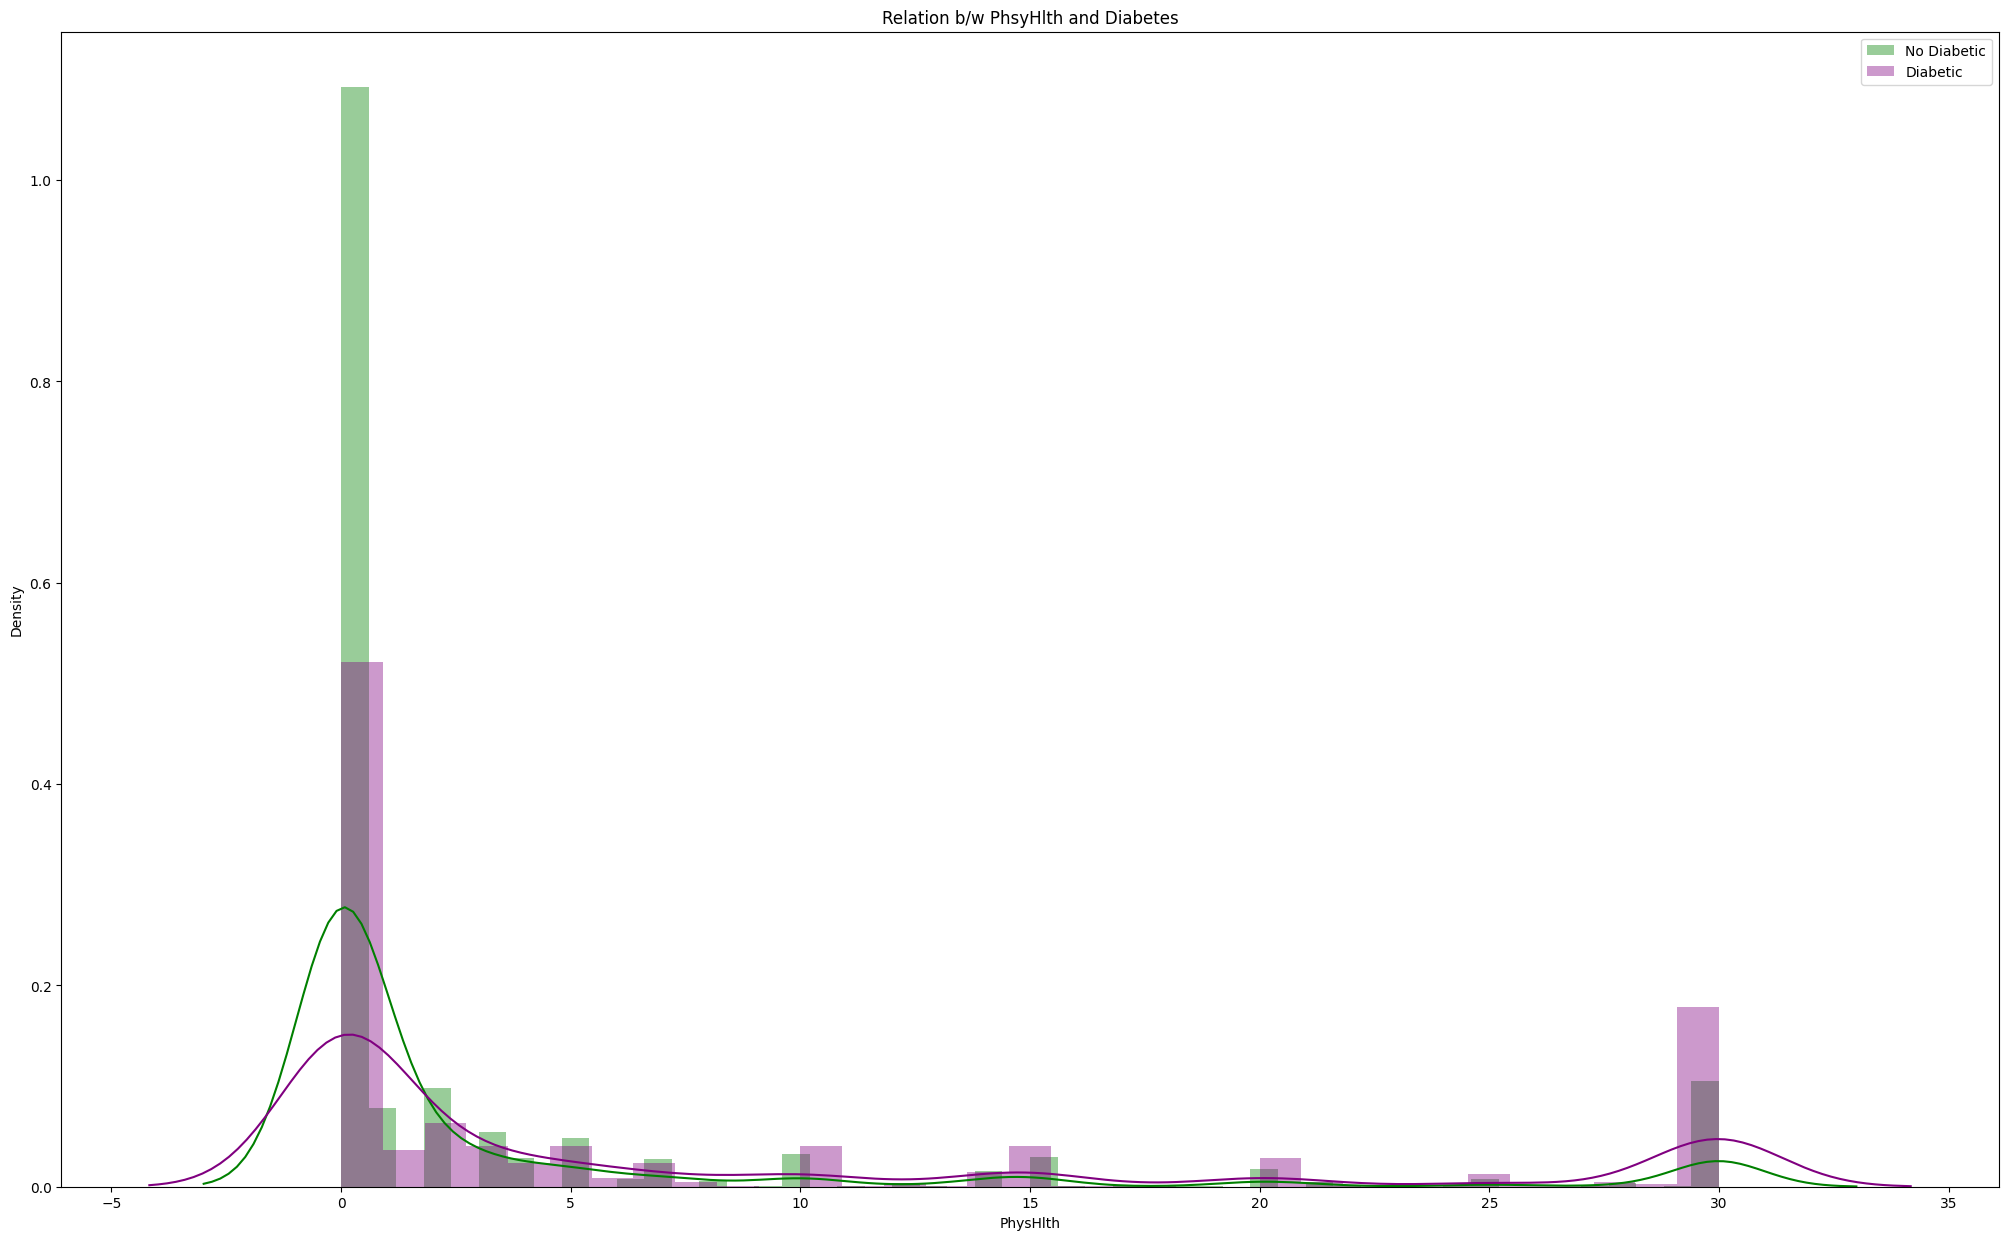

In [ ]:
plt.figure(figsize=(25, 15))
warnings.filterwarnings('ignore')

sns.distplot(data.PhysHlth[data.Diabetes_binary == 0], color="green", label="No Diabetic" )
sns.distplot(data.PhysHlth[data.Diabetes_binary == 1], color="purple", label="Diabetic" )
plt.title("Relation b/w PhsyHlth and Diabetes")

plt.legend()


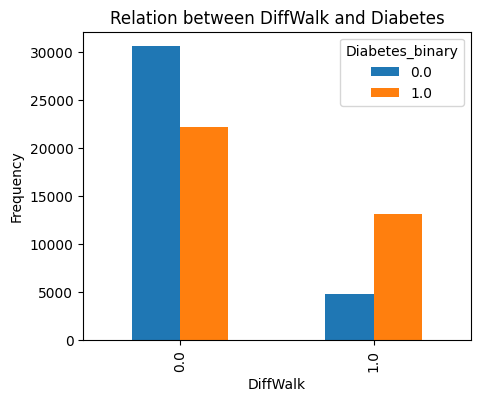

In [ ]:
pd.crosstab(data.DiffWalk, data.Diabetes_binary).plot(kind="bar",figsize=(5,4))

plt.title('Relation between DiffWalk and Diabetes')
plt.xlabel("DiffWalk")
plt.ylabel('Frequency')
plt.show()

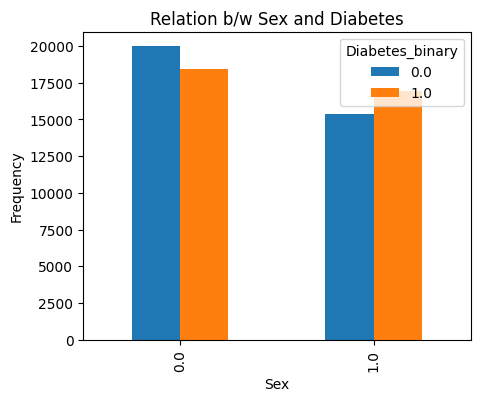

In [ ]:
pd.crosstab(data.Sex, data.Diabetes_binary).plot(kind="bar",figsize=(5,4))

plt.title('Relation b/w Sex and Diabetes')
plt.xlabel("Sex")
plt.ylabel('Frequency')
plt.show()

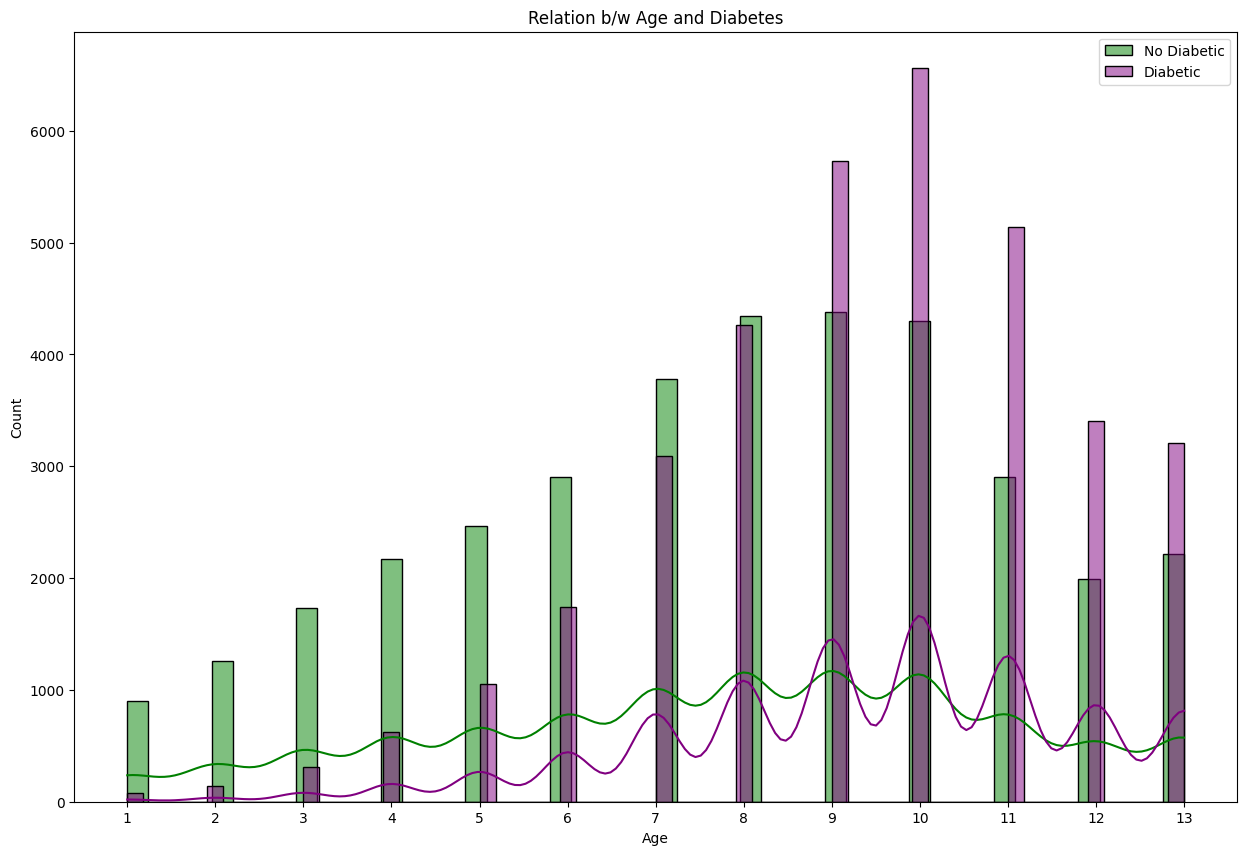

In [ ]:
plt.figure(figsize=(15, 10))
sns.histplot(data.Age[data.Diabetes_binary == 0], color="green", label="No Diabetic" , kde = True )
sns.histplot(data.Age[data.Diabetes_binary == 1], color="purple", label="Diabetic" , kde = True )
plt.title("Relation b/w Age and Diabetes")

plt.xticks(data["Age"].unique())
plt.legend()

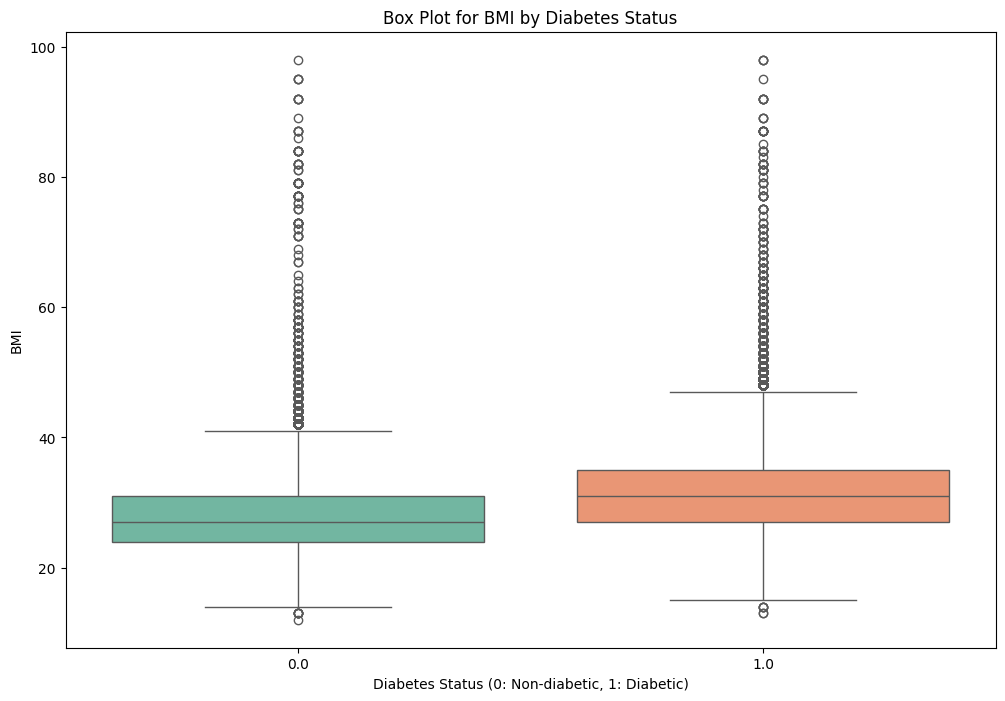

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/kuchbhi-kunal/nidan/main/diabetes_binary_5050split_health_indicators_BRFSS2015.csv"
df = pd.read_csv(url)

# Set the figure size
plt.figure(figsize=(12, 8))

# Box plot for BMI by Diabetes Status
sns.boxplot(x='Diabetes_binary', y='BMI', data=df, palette='Set2')

# Set plot title and labels
plt.title('Box Plot for BMI by Diabetes Status')
plt.xlabel('Diabetes Status (0: Non-diabetic, 1: Diabetic)')
plt.ylabel('BMI')

# Show the plot
plt.show()



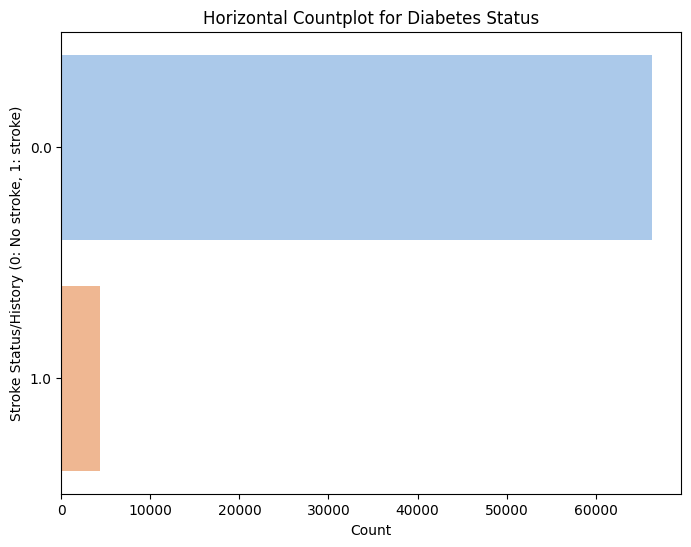

In [ ]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Horizontal Countplot for Diabetes_binary
sns.countplot(y='Stroke', data=df, palette='pastel')

# Set plot title and labels
plt.title('Horizontal Countplot for Diabetes Status')
plt.xlabel('Count')
plt.ylabel('Stroke Status/History (0: No stroke, 1: stroke)')

# Show the plot
plt.show()

**Data Predicition**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

%matplotlib inline

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

In [ ]:
data.head(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
5,0.0,0.0,0.0,1.0,18.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,2.0,7.0,0.0,0.0,0.0,1.0,4.0,7.0
6,0.0,0.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,13.0,5.0,6.0
7,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,4.0,0.0,0.0,0.0,1.0,6.0,4.0,3.0
8,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,6.0,8.0
9,0.0,0.0,0.0,1.0,27.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,6.0,0.0,1.0,6.0,4.0,4.0


**Diabetes descritptive analysis**

In [ ]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


<Axes: ylabel='Frequency'>

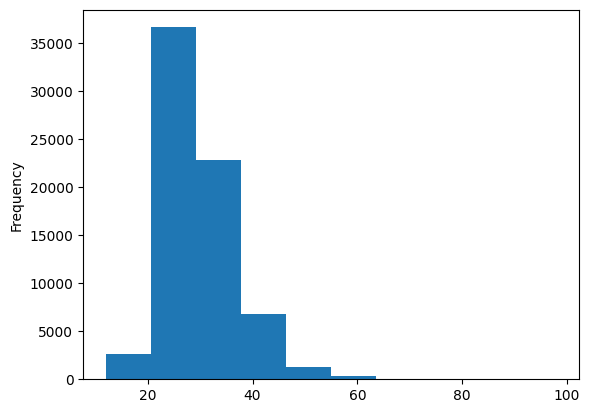

In [ ]:
data['BMI'].plot(kind='hist')

<Axes: ylabel='Frequency'>

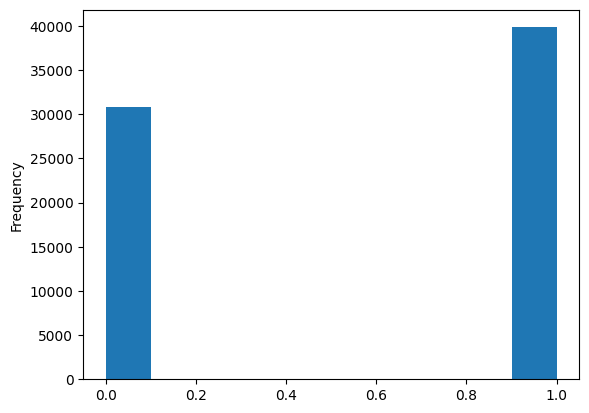

In [ ]:
data['HighBP'].plot(kind='hist')


<Axes: ylabel='Frequency'>

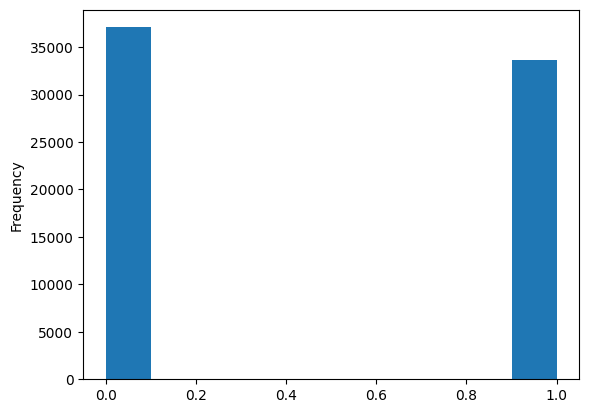

In [ ]:
data['Smoker'].plot(kind='hist')


<Axes: ylabel='Frequency'>

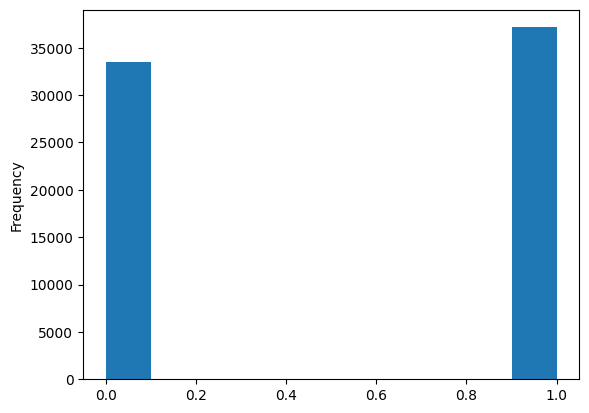

In [ ]:
data['HighChol'].plot(kind='hist')

<Axes: xlabel='Diabetes_binary'>

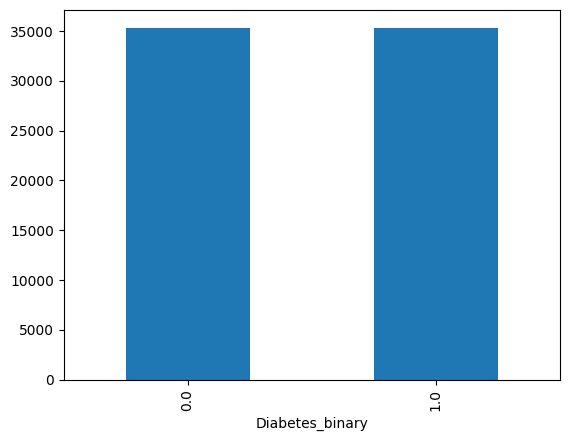

In [ ]:
data['Diabetes_binary'].value_counts().plot(kind='bar')


<Axes: title={'center': 'Correlation with Diabetes Prediction'}>

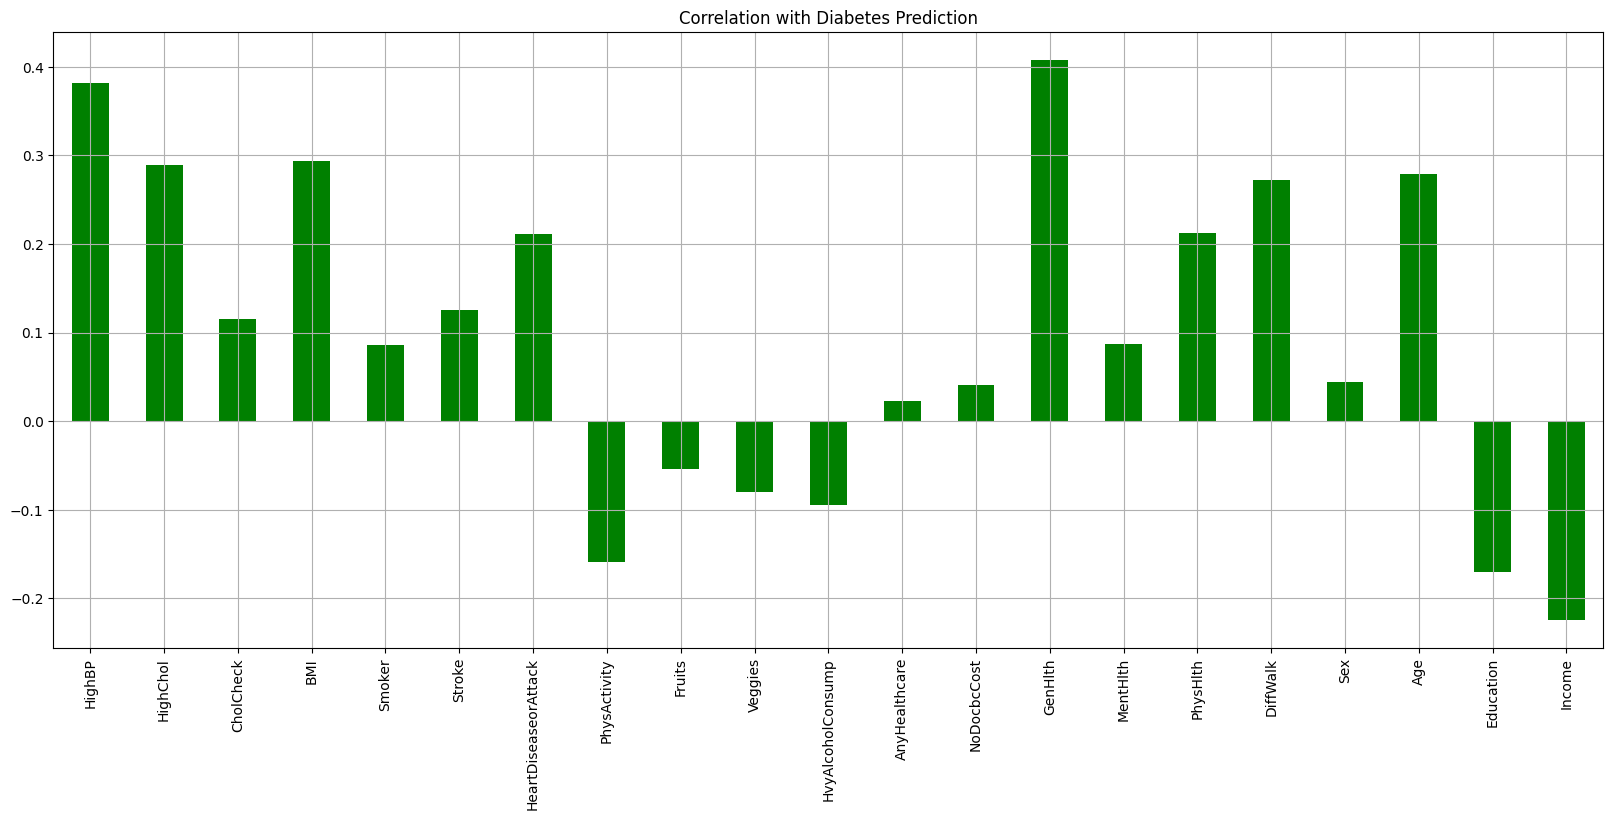

In [ ]:
data.drop('Diabetes_binary', axis=1).corrwith(data.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with Diabetes Prediction",color="green")


**Diabetes prediction**

In [ ]:
X = data[['BMI', 'HighBP']]
y = data['Diabetes_binary']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but recommended for some models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a logistic regression model (you can try other algorithms too)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.6927646934012306
Confusion Matrix:
[[4488 2602]
 [1742 5307]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.63      0.67      7090
         1.0       0.67      0.75      0.71      7049

    accuracy                           0.69     14139
   macro avg       0.70      0.69      0.69     14139
weighted avg       0.70      0.69      0.69     14139



**Prescriptive of Diabetes Prediction**


In [ ]:
#Take input
new_bmi=float(input("Enter BMI: "))
new_highbp=int(input("Enter HighBP (if high then type 1 or low then type0): "))

new_data = scaler.transform([[new_bmi, new_highbp]])

prediction = model.predict(new_data)
if prediction[0] == 1:
    print("The model predicts that the person is diabetic. It is advisable not to eat sugar and excercise daily.")
else:
    print("The model predicts that the person is not diabetic. But the person should take steps towards healthy lifestyle.")


Enter BMI: 25
Enter HighBP (if high then type 1 or low then type0): 0
The model predicts that the person is not diabetic. But the person should take steps towards healthy lifestyle.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# **Smoking Prediction**

In [ ]:
X = data[['Stroke', 'HeartDiseaseorAttack']]
y = data['Smoker']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but recommended for some models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a logistic regression model (you can try other algorithms too)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.5709031756135512
Confusion Matrix:
[[6449  976]
 [5091 1623]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.56      0.87      0.68      7425
         1.0       0.62      0.24      0.35      6714

    accuracy                           0.57     14139
   macro avg       0.59      0.56      0.51     14139
weighted avg       0.59      0.57      0.52     14139



**Prescriptive of smoking**

In [ ]:
new_stroke = float(input("Stroke; if yes 1, no 0: "))
new_heartdis = float(input("Enter 1 if Heart disease or 0 if not: "))

# Make prediction for the new data
new_data = scaler.transform([[new_stroke, new_heartdis]])

# Display the prediction and advice
prediction = model.predict(new_data)
if prediction[0] == 1:
    print("The model predicts that the person is a smoker. Try to reduce smoking and seek support if required.")
else:
    print("The model predicts that the person is non smoker. Try to have a healthy diet and regular checups for precaution.\n")


Stroke; if yes 1, no 0: 1
Enter 1 if Heart disease or 0 if not: 0
The model predicts that the person is a smoker. Try to reduce smoking and seek support if required.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**High Cholestrol Prediction**


In [ ]:
X = data[['Stroke', 'HvyAlcoholConsump']]
y = data['HighChol']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but recommended for some models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a logistic regression model (you can try other algorithms too)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.5325694886484192
Confusion Matrix:
[[ 293 6359]
 [ 250 7237]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.54      0.04      0.08      6652
         1.0       0.53      0.97      0.69      7487

    accuracy                           0.53     14139
   macro avg       0.54      0.51      0.38     14139
weighted avg       0.54      0.53      0.40     14139



**Prescriptive Of High cholestrol**


In [ ]:
# Now, take user input for new data
new_stroke = float(input("Stroke; if yes 1, no 0: "))
new_HvyAlcoholConsump = float(input("Alcohol consumption is true then 1 otherwise 0: "))

# Make prediction for the new data
new_data = scaler.transform([[new_stroke, new_HvyAlcoholConsump]])

# Display the prediction and advice
prediction = model.predict(new_data)
if prediction[0] == 1:
    print("The model predicts that the person is has high cholestrol. Advised have healthy diet and regular excercise.")
else:
    print("The model predicts that the person is may not have high cholestrol. Should have balanced diet and manage stress.")


Stroke; if yes 1, no 0: 1
Alcohol consumption is true then 1 otherwise 0: 1
The model predicts that the person is has high cholestrol. Advised have healthy diet and regular excercise.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**Correlation Matrix for Diabetes**

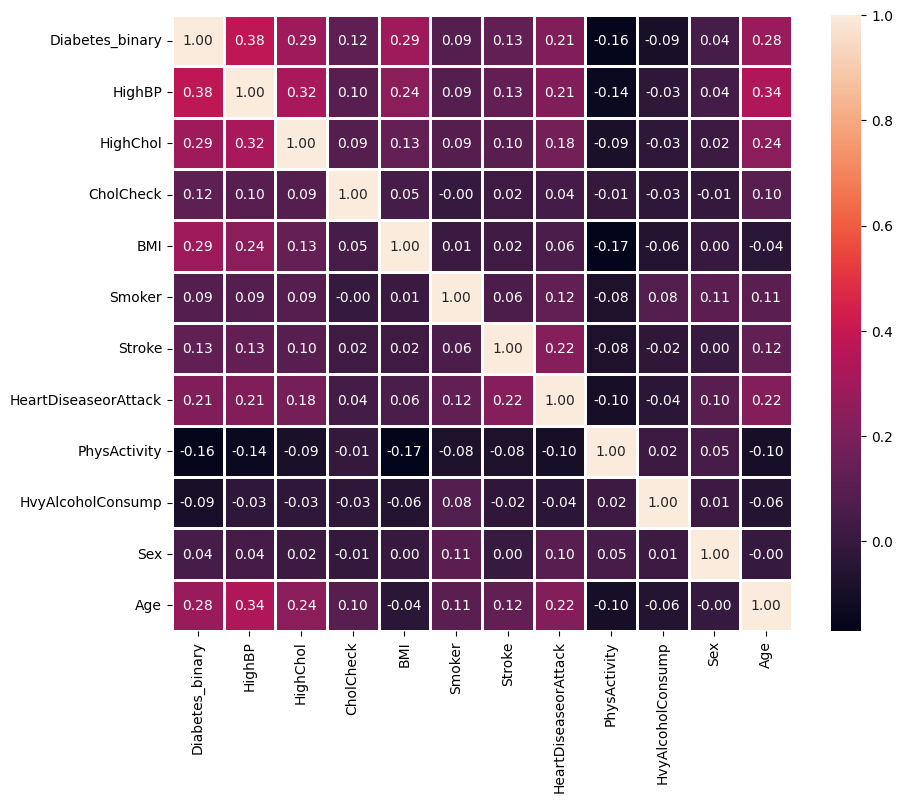

In [ ]:
columns_to_drop = ['Income', 'Education','DiffWalk', 'PhysHlth','MentHlth', 'GenHlth','NoDocbcCost', 'AnyHealthcare','Fruits','Veggies']
data.drop(columns=columns_to_drop, inplace=True)


corr_matrix = data.corr()
fig , ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.8,
                fmt='.2f')



** *italicized text*Anvo Test for Daibetes Prediciton**

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import f_oneway
# import pandas as pd

# Assuming 'data' is your DataFrame containing the dataset

# Fit the ANOVA model
model = ols('HighBP ~ C(Diabetes_binary)', data=data).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Print ANOVA table
print(anova_table)

# Interpret the results - Check the p-value in the ANOVA table for 'C(waterfront)'
alpha = 0.05 # significance level
if anova_table['PR(>F)']['C(Diabetes_binary)'] < alpha:
  print("Reject the null hypothesis - There are significant differences in High Blood Pressure (HighBP) between individuals with and without diabetes.")
else:
  print("Fail to reject the null hypothesis - There are no significant differences in High Blood Pressure (HighBP) between individuals with and without diabetes.")

sqft_living_no_waterfront = data[data['Diabetes_binary'] == 0]['HighBP']
sqft_living_waterfront = data[data['Diabetes_binary'] == 1]['HighBP']

# Perform ANOVA test
f_statistic, p_value = f_oneway(sqft_living_no_waterfront, sqft_living_waterfront)

# Print the results
print("F statistic:", f_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05 # significance level
if p_value < alpha:
  print("Reject the null hypothesis - There are significant differences in High Blood Pressure (HighBP) between individuals with and without diabetes.")
else:
  print("Fail to reject the null hypothesis - There are no significant differences in High Blood Pressure (HighBP) between individuals with and without diabetes.")


                          sum_sq       df             F  PR(>F)
C(Diabetes_binary)   2530.942341      1.0  12041.980062     0.0
Residual            14857.383353  70690.0           NaN     NaN
Reject the null hypothesis - There are significant differences in High Blood Pressure (HighBP) between individuals with and without diabetes.
F statistic: 12041.980062225079
P-value: 0.0
Reject the null hypothesis - There are significant differences in High Blood Pressure (HighBP) between individuals with and without diabetes.
